In [1]:
import sys
sys.path.append('../')
import jupman

import conf

conf.jm.init_icp()


# Pandas 1: introduzione

**Riferimenti:** [SoftPython - pandas 1](https://it.softpython.org/pandas/pandas1-intro-sol.html)

* visualizza al meglio in <img style="display:inline; width:25px; vertical-align: middle;" src="../_static/img/chrome.png" alttext="Chrome">
* versione stampabile: [clicca qua](?print-pdf)
* per navigare nelle slide: premere `Esc`

<br>
<br>

**Summer School Data Science 2023 - Modulo 1 informatica:** [Moodle](https://didatticaonline.unitn.it/dol/course/view.php?id=36683) 

Docente: David Leoni david.leoni@unitn.it

Esercitatore: Luca Bosotti luca.bosotti@studenti.unitn.it


## Dov'è Pandas?

![](img/pydata.png)

## Perchè Pandas?

Per analizzare rapidamente dataset che stanno in RAM

### Quale Pandas?

1.0: basato su numpy, di solito i tutorial che trovate in giro si riferiscono a questa versione

2.0: molto recente (luglio 2023), più efficiente, può supportare opzionalmente [PyArrow](https://levelup.gitconnected.com/welcoming-pandas-2-0-194094e4275b), tipi 'nullabili' 

### Alternative: 

- [Polars](https://www.pola.rs/) 

- Per big data: [PySpark](https://spark.apache.org/docs/latest/api/python/) , [PyArrow](https://arrow.apache.org/docs/python/index.html), ...

## Astropi: un dataset... spaziale!

- File: [astropi.csv]('astropi.csv')
- Fonte: [ESA / Raspberry foundation](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis) (abbiamo sostituito ROW_ID con time_stamp)

<img width="70%" src="img/International_Space_Station_exploded_diagram_large.jpg" alttext="International_Space_Station_exploded_diagram_large">

### Carichiamo il dataset

- ricordarti l'encoding

In [2]:
import pandas as pd   
import numpy as np    
df = pd.read_csv('astropi.csv', encoding='UTF-8')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_stamp  110869 non-null  object 
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
dtypes:

### Memoria

**Perchè c'è** `+` **dopo i megabyte?** 

- Prova ad aggiungere il parametro `memory_usage="deep"` alla chiamata `df.info`
- Confronta con quanto occupa in Windows

### Dimensioni

In [4]:
df.shape

(110869, 19)

**DOMANDA**: attributo o metodo?

### Esploriamo

In [5]:
df.head(3)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0


In [6]:
df.tail(3)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
110866,2016-02-29 09:24:41,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0
110867,2016-02-29 09:24:50,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0
110868,2016-02-29 09:25:00,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0


## Qualche statistica 1/2

In [7]:
df.describe()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**DOMANDA**: mancano campi? Perchè?

### Qualche statistica 2/2

In [8]:
df.corr()

,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
temp_cpu,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970
temp_h,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325
temp_p,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205
humidity,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066
pressure,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259
pitch,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176
roll,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636
yaw,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558
mag_x,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879
mag_y,-0.285192,-0.276276,-0.283427,0.077897,-0.074578,0.006133,0.060297,0.549394,0.001239,1.000000,-0.266351,0.014057,0.051619,-0.053016,0.001239,0.001063,0.001530,-0.001335


### Astropi: Le colonne

In [9]:
df.columns

Index(['time_stamp', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset'],
      dtype='object')

- Che sequenza è?
- E' iterabile? 
- E' indicizzabile?

### Una colonna, due notazioni  1/2

In [10]:
df['humidity']

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

In [11]:
df.humidity

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

### Una colonna, due notazioni 2/2

**DOMANDA**: In genere, funzionerà con tutti i campi?

### Una colonna: esploriamo!
    
- Come possiamo sapere qual'è il tipo di una colonna?


- Prova a iterare


- Prova ad accedere ad una cella specifica

### Esercizio - info meteo

- Crea dataframe `meteo` da file [meteo.csv](meteo.csv), **assegna il dataframe ad una variabile chiamata** `meteo` (fonte dati: [meteotrentino.it](https://www.meteotrentino.it))
- Visualizza qualche info



```text
COLONNE: Data, Pressione, Pioggia, Temp

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       2878 non-null   object 
 1   Pressione  2878 non-null   float64
 2   Pioggia    2878 non-null   float64
 3   Temp       2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 272.7 KB

PRIME RIGHE:
               Data  Pressione  Pioggia  Temp
0  01/11/2017 00:00      995.4      0.0   5.4
1  01/11/2017 00:15      995.5      0.0   6.0
2  01/11/2017 00:30      995.5      0.0   5.9
3  01/11/2017 00:45      995.7      0.0   5.4
4  01/11/2017 01:00      995.7      0.0   5.3
```    

## Plottiamo!

<table>
<tr>
<td width="40%">

```python
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df.humidity.plot(label="Humidity", 
                 legend=True)

df.pressure.plot(secondary_y=True, 
                 label="Pressure", 
                 legend=True);
plt.show()
```
</td>
<td>
<img src="img/humidity-pressure-overlay.png">
</td>
</tr>
</table>

per asse y a destra del grafico pressione: `secondary_y=True`

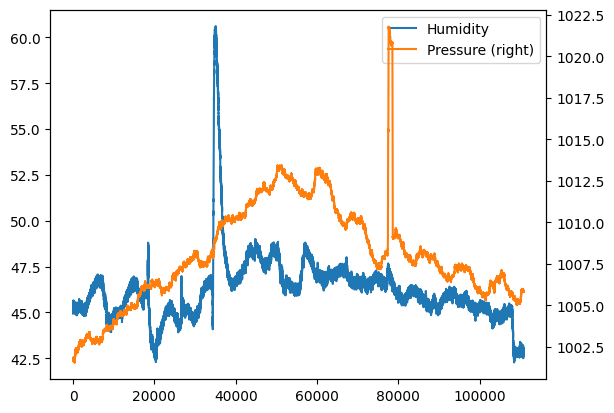

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

df.humidity.plot(label="Humidity", legend=True)

df.pressure.plot(secondary_y=True, label="Pressure", legend=True);
#jupman-purge
plt.savefig('img/humidity-pressure-overlay.png')
#/jupman-purge
plt.show()

### Il caro vecchio `plt.plot`

In [13]:
df.index  # Per ottenere le coordinate x

RangeIndex(start=0, stop=110869, step=1)

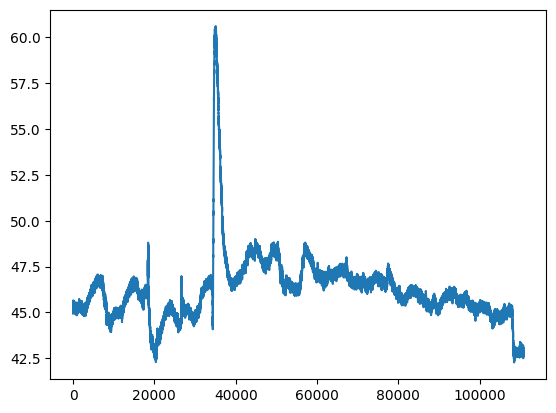

In [14]:
plt.plot(df.index, df['humidity']); # df.index si può usare come sequenza iterabile

## Operazioni su righe

**Selezionare**

**Filtrare**

**Ordinare**


### Selezionare righe con `iloc`

In [15]:
df.iloc[6]

time_stamp    2016-02-16 10:45:41
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                  -50.447346
mag_y                   -7.937309
mag_z                  -12.188574
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
Name: 6, dtype: object

**Che tipo ci viene tornato**?

#### Selezionare slice con `iloc`

In [16]:
df2=df.iloc[12500:15000]

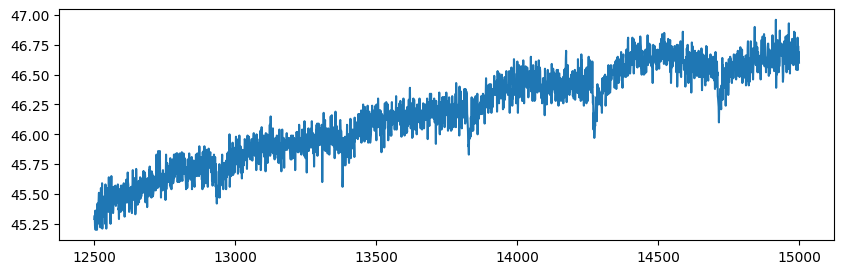

In [17]:
# Utile per zoommare!

plt.figure(figsize=(10,3))
plt.plot(df2.index, df2['humidity']);

#### `iloc` su dataframe filtrati

In [18]:
df2.head(3)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
12500,2016-02-17 21:44:31,31.87,27.7,25.15,45.29,1004.56,0.85,52.78,357.18,30.517177,2.892431,0.371669,-0.000618,0.019318,0.014503,-0.000135,-0.000257,0.000121,0
12501,2016-02-17 21:44:40,31.84,27.7,25.16,45.32,1004.58,0.97,52.73,357.32,30.364154,2.315241,0.043272,-0.001196,0.019164,0.014545,0.000254,0.000497,-0.000010,0
12502,2016-02-17 21:44:51,31.83,27.7,25.15,45.23,1004.55,1.40,52.84,357.76,29.760987,1.904932,0.037701,-0.000617,0.019420,0.014672,0.000192,0.000081,0.000024,0


In [19]:
df2.iloc[0]

time_stamp    2016-02-17 21:44:31
temp_cpu                    31.87
temp_h                       27.7
temp_p                      25.15
humidity                    45.29
pressure                  1004.56
pitch                        0.85
roll                        52.78
yaw                        357.18
mag_x                   30.517177
mag_y                    2.892431
mag_z                    0.371669
accel_x                 -0.000618
accel_y                  0.019318
accel_z                  0.014503
gyro_x                  -0.000135
gyro_y                  -0.000257
gyro_z                   0.000121
reset                           0
Name: 12500, dtype: object

#### `iloc` vs `loc`

**ATTENZIONE**: 

- `.iloc[0]` seleziona la riga iniziale
- `.loc[0]` seleziona la riga  _ad indice_ con valore zero, _se presente_!

**Prova** `.loc[0]` **con una slice come** `df2` **Che succede?**

In [20]:
df2.head(3)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
12500,2016-02-17 21:44:31,31.87,27.7,25.15,45.29,1004.56,0.85,52.78,357.18,30.517177,2.892431,0.371669,-0.000618,0.019318,0.014503,-0.000135,-0.000257,0.000121,0
12501,2016-02-17 21:44:40,31.84,27.7,25.16,45.32,1004.58,0.97,52.73,357.32,30.364154,2.315241,0.043272,-0.001196,0.019164,0.014545,0.000254,0.000497,-0.000010,0
12502,2016-02-17 21:44:51,31.83,27.7,25.15,45.23,1004.55,1.40,52.84,357.76,29.760987,1.904932,0.037701,-0.000617,0.019420,0.014672,0.000192,0.000081,0.000024,0


### Filtrare righe

In [21]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0


In [22]:
df.humidity < 45.2

0          True
1          True
2          True
3         False
4          True
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: humidity, Length: 110869, dtype: bool

#### Combinare filtri

In [23]:
df.head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
0,2016-02-16 10:44:40,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
3,2016-02-16 10:45:10,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0


In [24]:
(df.humidity > 45.0) & (df.humidity < 45.2)    # come numpy!

0         False
1          True
2          True
3         False
4          True
          ...  
110864    False
110865    False
110866    False
110867    False
110868    False
Name: humidity, Length: 110869, dtype: bool

### Combinare filtri: `or` ?

In [25]:
(df.humidity < 45.0) | (df.humidity > 45.2) 

0          True
1         False
2         False
3          True
4         False
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: humidity, Length: 110869, dtype: bool

#### Applicare filtri 1/2

In [26]:
df[  (df.humidity > 45.0) & (df.humidity < 45.2)   ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
1,2016-02-16 10:44:50,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0
2,2016-02-16 10:45:00,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0
4,2016-02-16 10:45:20,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0
5,2016-02-16 10:45:30,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0
10,2016-02-16 10:46:20,31.68,27.53,25.00,45.16,1001.72,1.32,53.52,186.24,-51.616473,-6.818130,-11.860839,-0.000530,0.019477,0.014500,0.000268,0.001194,0.000106,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108001,2016-02-29 01:23:30,32.32,28.20,25.57,45.05,1005.74,1.32,50.04,338.15,15.549799,-1.424077,-9.087291,-0.000754,0.017375,0.014826,0.000908,0.000447,0.000149,0
108003,2016-02-29 01:23:50,32.28,28.18,25.57,45.10,1005.76,1.65,50.03,338.91,15.134025,-1.776843,-8.806690,-0.000819,0.017378,0.014974,0.000048,-0.000084,-0.000039,0
108004,2016-02-29 01:24:00,32.30,28.18,25.57,45.11,1005.74,1.70,50.21,338.19,14.799790,-1.695364,-8.895130,-0.000739,0.017478,0.014792,-0.000311,-0.000417,-0.000008,0
108006,2016-02-29 01:24:20,32.29,28.19,25.57,45.02,1005.73,0.81,49.81,339.24,14.333920,-2.173228,-8.694976,-0.000606,0.017275,0.014725,-0.000589,-0.000443,-0.000032,0


#### Applicare filtri 2/2 - Come trovare riga la cui pressione è massima?

In [27]:
df[  (df.pressure == df.pressure.values.max())  ]

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
77602,2016-02-25 12:13:20,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0


### Ordinare

Nota: di default produce un NUOVO dataset

In [28]:
df.sort_values('pressure',ascending=False)

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
77602,2016-02-25 12:13:20,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0
77601,2016-02-25 12:13:10,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0
77603,2016-02-25 12:13:30,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0
77604,2016-02-25 12:13:40,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0
77608,2016-02-25 12:14:20,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2016-02-16 11:58:41,31.71,27.49,24.99,45.05,1001.57,1.25,53.62,228.15,-4.808056,1.551141,-5.496866,-0.000579,0.019500,0.014510,-0.000039,0.000111,0.000098,0
442,2016-02-16 11:58:50,31.68,27.48,24.98,45.20,1001.57,2.01,53.24,226.81,-4.815926,1.513994,-5.251955,-0.000609,0.019570,0.014721,0.000449,0.000260,0.000249,0
432,2016-02-16 11:57:11,31.67,27.50,24.99,45.08,1001.56,1.34,53.47,226.80,-5.030561,1.955167,-5.163678,-0.000564,0.019500,0.014483,0.000365,0.000869,-0.000011,0
440,2016-02-16 11:58:30,31.68,27.50,24.99,45.15,1001.56,1.47,53.54,227.68,-4.908951,1.617281,-5.434710,-0.000566,0.019576,0.014451,-0.000438,0.000080,-0.000182,0


### Esercizio - statistiche meteo

✪ Analizza i dati del Dataframe `meteo` per trovare:

- i valori di pressione media, minima e massima

- la temperatura media

- le date delle giornate di pioggia

## Valori object e stringhe



Gli operatori e funzioni normali di Python **operano su stringhe singole**

Con Pandas dobbiamo **cambiare approccio**

Collezione di funzioni **che operano su serie di stringhe**:

In [29]:
df['time_stamp'].str

###  `in` non funziona

Esempio: Come filtriare gli ultimi giorni di febbraio?

In [30]:
'2016-02-2' in df['time_stamp']  # SBAGLIATO!

False

```python
df[ '2016-02-2' in df['time_stamp'] ]   # BOOM!
```

```python
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~/.local/lib/python3.7/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3360             try:
-> 3361                 return self._engine.get_loc(casted_key)
   3362             except KeyError as err:

~/.local/lib/python3.7/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

~/.local/lib/python3.7/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: False
```

### Come filtriare gli ultimi giorni di febbraio?

In [31]:
df['time_stamp'].str.contains('2016-02-2')  # OK

0         False
1         False
2         False
3         False
4         False
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: time_stamp, Length: 110869, dtype: bool

###  Applichiamo il filtro con `contains`

Filtra ultimi giorni di febbraio:

In [32]:
df[  df['time_stamp'].str.contains('2016-02-2') ].head()

,time_stamp,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
30442,2016-02-20 00:00:00,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,-12.947023,4.066202,-0.000612,0.018792,0.014558,-0.000042,0.000275,0.000157,0
30443,2016-02-20 00:00:10,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,-13.143595,3.499386,-0.000718,0.019290,0.014667,0.000260,0.001011,0.000149,0
30444,2016-02-20 00:00:41,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,-13.827667,4.438656,-0.000700,0.018714,0.014598,0.000299,0.000343,-0.000025,0
30445,2016-02-20 00:00:50,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,-13.999682,4.517029,-0.000657,0.018857,0.014565,0.000160,0.000349,-0.000190,0
30446,2016-02-20 00:01:01,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,-14.065591,4.448778,-0.000678,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0


### Slice di stringhe

Supponiamo di voler estrarre il giorno:

In [33]:
df['time_stamp'].head()

0    2016-02-16 10:44:40
1    2016-02-16 10:44:50
2    2016-02-16 10:45:00
3    2016-02-16 10:45:10
4    2016-02-16 10:45:20
Name: time_stamp, dtype: object

Possiamo usare `.str` _come se fosse una stringa_ e applicare la solita notazione con quadre per le slice:

In [34]:
df['time_stamp'].str[8:10]

0         16
1         16
2         16
3         16
4         16
          ..
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

## Operazioni su colonne

**Selezionare**

**Aggiungere / scrivere**

**Trasformare**

### Selezionare colonne

In [35]:
df[  ['temp_h', 'temp_p', 'time_stamp']  ]

,temp_h,temp_p,time_stamp
0,27.57,25.01,2016-02-16 10:44:40
1,27.53,25.01,2016-02-16 10:44:50
2,27.53,25.01,2016-02-16 10:45:00
3,27.52,25.01,2016-02-16 10:45:10
4,27.54,25.01,2016-02-16 10:45:20
...,...,...,...
110864,27.52,24.83,2016-02-29 09:24:21
110865,27.50,24.83,2016-02-29 09:24:30
110866,27.50,24.83,2016-02-29 09:24:41
110867,27.50,24.83,2016-02-29 09:24:50


### Aggiungere colonne

Pandas supporta operazioni algebriche. 

Creaiamo NUOVA colonna in fondo:

In [36]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2 

Selezioniamo per vedere il risultato:

In [37]:
df.head()[['time_stamp', 'mag_x', 'mag_y', 'mag_z', 'mag_tot']] 

,time_stamp,mag_x,mag_y,mag_z,mag_tot
0,2016-02-16 10:44:40,-46.422753,-8.132907,-12.129346,2368.337207
1,2016-02-16 10:44:50,-48.778951,-8.304243,-12.943096,2615.870247
2,2016-02-16 10:45:00,-49.161878,-8.470832,-12.642772,2648.484927
3,2016-02-16 10:45:10,-49.341941,-8.457380,-12.615509,2665.305485
4,2016-02-16 10:45:20,-50.056683,-8.122609,-12.678341,2732.388620


### Quando il campo magnetico è più forte?

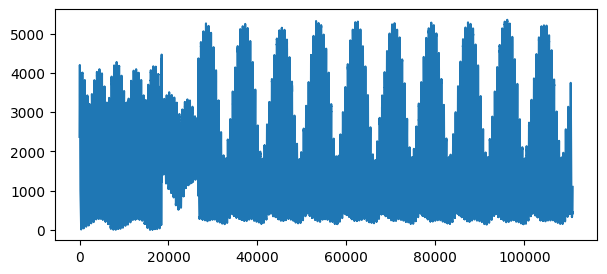

In [38]:
plt.figure(figsize=(7,3))
df.mag_tot.plot();

In [39]:
df['time_stamp'][df.mag_tot == df.mag_tot.values.max()]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

**Dov'era più forte?** Prova a inserire il valore in questo sito: [isstracker.com/historical](http://www.isstracker.com/historical)

### Esercizio - temperatura meteo in Fahrenheit 

Nel dataframe `meteo`, crea una colonna `TempFahrenheit` con la temperatura misurata in gradi Fahrenheit

Formula per calcolare la conversione dai gradi Celsius (C):

$Fahrenheit = \frac{9}{5}C + 32$

### Esercizio - Pressione vs Temperatura

Secondo la [Legge di Gay-Lussac](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law), in un ambiente chiuso la pressione dovrebbe essere direttamente proporzionale alla temperatura:

$\frac{P}{T} = k$

E' vero per il dataset del `meteo`? Prova a scoprirlo calcolando direttamente la formula e comparando con i risultati del metodo `corr()`

### Scrivere in colonne filtrate con `.loc`

In [40]:
df.loc[ df.temp_cpu > 31.68,'cpu_troppo_calda'] = True

In [41]:
df.head()[['time_stamp', 'temp_cpu', 'cpu_troppo_calda']]  

,time_stamp,temp_cpu,cpu_troppo_calda
0,2016-02-16 10:44:40,31.88,True
1,2016-02-16 10:44:50,31.79,True
2,2016-02-16 10:45:00,31.66,NaN
3,2016-02-16 10:45:10,31.69,True
4,2016-02-16 10:45:20,31.66,NaN


**DOMANDA**: cosa ha scritto nelle righe _non_ selezionate?

### Scrivere in colonne filtrate con `.where`

In [42]:
pressione_media = df.pressure.values.mean()

In [43]:
df['controllo_pressione']=np.where(df.pressure <= pressione_media,'sotto','sopra')

Selezioniamo per vedere righe con variazioni:

In [44]:
df.iloc[29739:29745][['time_stamp', 'pressure', 'controllo_pressione']] 

,time_stamp,pressure,controllo_pressione
29739,2016-02-19 22:01:30,1008.10,sotto
29740,2016-02-19 22:01:40,1008.11,sotto
29741,2016-02-19 22:01:50,1008.15,sopra
29742,2016-02-19 22:02:01,1008.13,sopra
29743,2016-02-19 22:02:10,1008.11,sotto
29744,2016-02-19 22:02:21,1008.12,sotto


### Trasformare una colonna - un problema

Come convertire tutti i valori della colonna umidità da float a interi?

In [45]:
df['humidity']

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

Intanto, come convertire  UN solo valore?

In [46]:
int(44.12)

44

### Come trasformare TUTTA una colonna?

Usiamo il metodo `.transform`:

In [47]:
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

**NOTA**: a `transform` passiamo _l'oggetto funzione_ `int`

**DOMANDA**: chi chiama `int`?

## Trasformare una colonna

### ...stessa minestra

In [48]:
def mia_f(x):
    return int(x)

df['humidity'].transform(mia_f)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

### Trasformare una colonna

### ...minestra alla `lambda`

In [49]:
df['humidity'].transform( lambda x: int(x) )

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

### Trasformare - è cambiato qualcosa?

In [50]:
df['humidity']

0         44.94
1         45.12
2         45.12
3         45.32
4         45.18
          ...  
110864    42.94
110865    42.72
110866    42.83
110867    42.81
110868    42.94
Name: humidity, Length: 110869, dtype: float64

### Trasformare veramente - riassegnamo!

In [51]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

In [52]:
df[ ['time_stamp', 'humidity_int', 'humidity' ]  ]

,time_stamp,humidity_int,humidity
0,2016-02-16 10:44:40,44,44.94
1,2016-02-16 10:44:50,45,45.12
2,2016-02-16 10:45:00,45,45.12
3,2016-02-16 10:45:10,45,45.32
4,2016-02-16 10:45:20,45,45.18
...,...,...,...
110864,2016-02-29 09:24:21,42,42.94
110865,2016-02-29 09:24:30,42,42.72
110866,2016-02-29 09:24:41,42,42.83
110867,2016-02-29 09:24:50,42,42.81


In [53]:
#jupman-purge-io
# scrivi qui
''

''